# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_overview)
    * [Conclusions](#data_overview_conclusions)
* [Stage 2. Data preprocessing and analyzing](#data_preprocessing)
    * [2.6 Conclusions](#data_preprocessing_conclusions)
* [Stage 3 Testing the hypothesis (see introduction for each hypothesis).](#hypothesis)
    * [3.1 Hypothesis 1:  ](#Hypothesis_1)
    * [3.2 Hypothesis 2: ](#Hypothesis_2)
   
* [Findings and Conclusions](#end)



#  Introduction: Determine whether a video game succeeds or not.  <a id='intro'></a>
I work for Ice, an online video game store. We need to determine which video games are successful and which ones are not by finding patterns in sales, ratings, regions... We will give insights for the coming year 2017 (lets pretend that the current year is 2016). The data in the tables goes back to 1998.
### Goal: 
Test hypotheses:

1. Average user ratings of the Xbox One and PC platforms are the same.
2. Average user ratings for the Action and Sports genres are different.



### Stages 


First, I'll evaluate the quality of the data and see if the data is clean enough to work with. Then, during data preprocessing, I will account for any other critical problems with the data. I will replace NaN values or delete them if I can justify dropping them. I will check for duplicates and make sure the data is good to go for making graphs and analysis. 
 
My project will consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Testing the hypotheses
 4. Conclusion and key takeaways
 
[Back to Contents](#back)


## Data Overview  <a id='data_overview'></a>

In [1]:
#First load libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from scipy import stats as st #bring in stats as well

In [2]:
try:
    game_data = pd.read_csv('datasets/games.csv') #read csv file stored locally on my laptop
except:
    game_data = pd.read_csv('/datasets/games.csv') #make an exception for when I upload the project to Practicum

In [3]:
game_data.head() #Lets take a quick glance at how the df looks.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
game_data.shape #checking the number of rows and columns. 

(16715, 11)

In [5]:
game_data[game_data.duplicated()] #Checking for duplicates and we see there are no duplicates.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [6]:
game_data.info(); #We print the info and see that some columns have NaN or Null values we see this if they have less rows than total rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Data Overview - Conclusions

From info method we can see that all columns with less than total row count of 16715 of non-null values show that they actually have null or NaN values.  Name and genre have only 2 null or NaN values each so we will deal with these NaNs first since they are such a small percentage. Some of the data types are not correct but sometimes you have to get rid of NaN values first before being able to change the data type.  

## Data preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

We can see that the columns names have a combination of lower and upper case. We need to make them all lower for consistency. 

In [7]:
game_data.columns = game_data.columns.str.strip() #make sure there are no spaces at beginning or end of each column name.
game_data.columns = game_data.columns.str.lower() # make all column names lower case

In [8]:
game_data.head() #Taking another look at the column heads and they look much better in the snake format.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Lets see how far back our data goes. We can see it goes back to 1980 when there were only 9 games release that year.

In [9]:
game_data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

We can see that in 2008 the number of total games launched peaked then it began to decline all the way till 2016. We will keep this in mind for further analysis later. For now lets focus on dropping NaN values and data preprocessing. 

Text(0.5, 1.0, 'Number of games release by year')

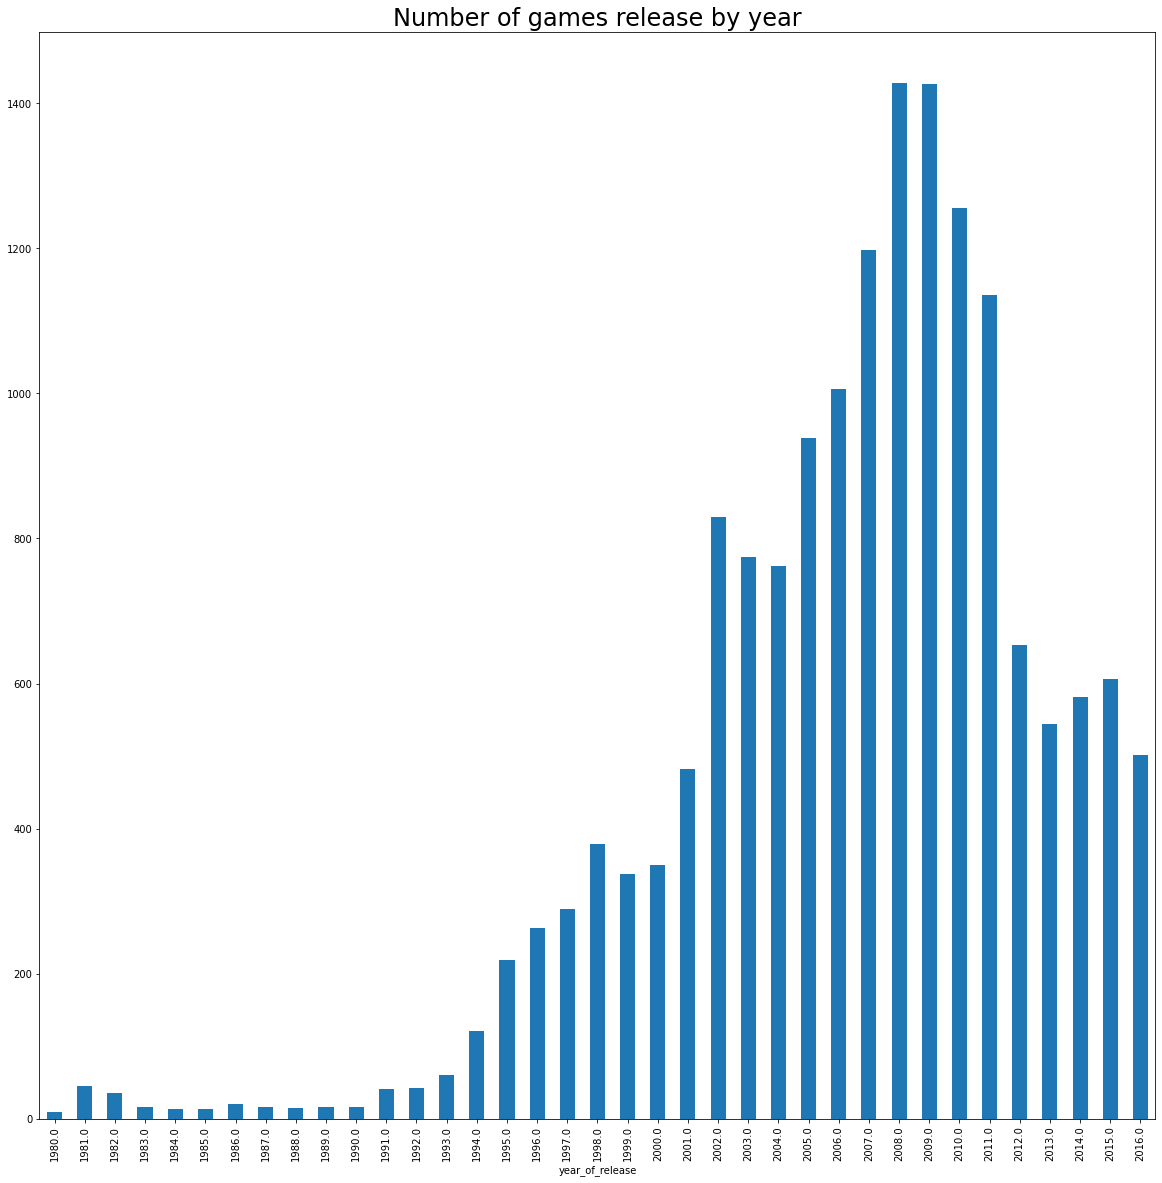

In [10]:
game_data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20,20))
plt.title('Number of games release by year', fontsize = 24)

In [11]:
#There are only 2 NaN values in the name column after taking a look at those 2 rows I see their sales are not significant so I can drop them.
game_data.query('name.isna()') #there are 2 rows where there is no name from back in 1993. I will drop these 2 rows since sales are small for them.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We see that the same rows that that have NaN for name are also the same ones that have NaN for genre. They also have all the critic_score, user_score and rating as NaN so these 2 rows are going to be quite useless for our analysis. The platform is GEN and we don't need this platform for any of the Hypothesis that we are testing. Also for forecasting sales to 2017 I will not go back to year 1993 since the gaming industry has changed too much since then and most platforms that we have today did not even exist back then. The platform GEN only had sales for one year in 1993 and then disappeared. For all these reasons it is safe to drop these 2 rows even though row 659 did have a decent amount of sales in North America it would not be included in my analysis because the year_of_release is too far in the past.

In [12]:
game_data = game_data.dropna(subset=['name']) #drop NaN values in name
game_data.query('name.isna()')  # We can see that we have no more NaN in the Name or the genre columns.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
game_data.query('genre.isna()') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


We also see that some data types are not correct for example: year_of_release should be an integer not a float. But first we have to get rid of NaN values in this column.  

In [14]:
game_data.query('year_of_release.isna()') #Lets look at the NaN values a see what values we can fill NaNs with.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We have 269 rows with NaN 'year_of_release'. I noticed that the name sometimes contains a year at the end of the name. I'm going to assume that corresponds to the release year. So for all video game names that include a 4 digit year I will use that to populate the year_of_release column that has a NaN. We also want to see if the NaN values have significant total sales or not.

In [15]:
'Madden NFL 2004	' # Some names of games have a tab \t at the end of the name. 

'Madden NFL 2004\t'

In [16]:
#Let us create a new column with the sum of all sales accross all markets.
# I do this step first since it is also useful in getting rid of NaN values since if the sales are small it is safe to get rid of rows.
game_data['ttl_sales'] = game_data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
game_data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


For top 20 games by sales none of them fall in the last 4 years except Grand Theft Auto V in 2013 on PS3.

In [17]:
print(game_data.query('year_of_release.isna() and ttl_sales>=.5').count().iloc[0])
#Checking to see how many NaN values in 'year_of_release' have more than 0.5M in sales accross all markets (ttl_sales).
game_data.query('year_of_release.isna() and ttl_sales<.5').count().iloc[0]

53


216

As we can see the majority of the games that had a year of NaN did not have much in total sales across all markets when compared to the median for ttl_sales (total_sales). I chose median since there is a big difference between mean and median when I look at the describe method (below) and when you see a big gap it's better to use median as the central tendency point since there are probably big outliers in sales pulling the mean higher.


In [18]:
game_data['ttl_sales'].describe() 
#Taking a look and we can see that for them to be a successful game they probably need to be in the top 25% so over .47 M in ttl_sales.


count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: ttl_sales, dtype: float64

In [19]:
#I will write a function to check if there is a 4 digit year inside the name and otherwise returns 0.
#then test the function

def check_for_int (names):
    num = 0
    counter = -1
    for num in names:
        
        counter +=1
        if num.isdigit():
            
            return pd.to_numeric(names[counter:(counter+4)], errors='coerce' )
    else:
        return 0

names_1 = 'Virtua Quest 2008'
print(check_for_int(names_1) ) #Testing my function to make sure it picks up the year when its at the end


2008


In [20]:
game_data.query('year_of_release.isna()').count().iloc[0]

269

In [21]:
#game_data['year_of_release'].fillna(game_data['name'].apply(check_for_int), inplace = True)
#car_data['condition'].apply(condition_tiers)

game_data['new_release_year'] = game_data['name'].apply(check_for_int) #we call the function on every name in df and create a new column with the results

game_data['new_release_year'] = pd.to_numeric(game_data['new_release_year'], errors='coerce') #Change data type to numeric
game_data[(game_data['new_release_year']=='2003') & (game_data['year_of_release'].isna())]

for index, row in game_data.iterrows():
        if pd.isna(row['year_of_release']) and (row['new_release_year'] in ('1999','2000','2001','2002','2003'\
        ,'2004','2005','2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015','2016')): 
#We make sure only values with an actual 4 digit year are included since "new_release_year" picked up some invalid years
            game_data.loc[index,'year_of_release'] = row['new_release_year']
            
game_data.query('year_of_release.isna()').count().iloc[0] #Count how many NaN values we have now and we see we have filled 17 NaN values only



269

In [22]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16713 non-null  object 
 2   year_of_release   16444 non-null  float64
 3   genre             16713 non-null  object 
 4   na_sales          16713 non-null  float64
 5   eu_sales          16713 non-null  float64
 6   jp_sales          16713 non-null  float64
 7   other_sales       16713 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  object 
 10  rating            9949 non-null   object 
 11  ttl_sales         16713 non-null  float64
 12  new_release_year  14967 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


I was able to get rid of 17 NaN values by using the name to see if there was a complete 4 digit year in the name and use that instead of NaN.

In [23]:
game_data.groupby('name')['ttl_sales'].count()# We can see that some name titles have more than one row. Lets look at some examples

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: ttl_sales, Length: 11559, dtype: int64

In [24]:
game_data[game_data['name']=="uDraw Studio: Instant Artist"] # We see below that same name but different platforms.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales,new_release_year
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.0,0.02,NaN,tbd,E,0.17,0.0
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.0,0.00,54.0,5.7,E,0.02,0.0


This means we can use title names of games that appear more than once and populate the other NaN values in year_of_release with the one that is populated since it was probably release the same year but on a different platform or shortly after that year.

In [25]:
game_data['year_of_release'] = pd.to_numeric(game_data['year_of_release'], errors='coerce')

In [26]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16713 non-null  object 
 2   year_of_release   16444 non-null  float64
 3   genre             16713 non-null  object 
 4   na_sales          16713 non-null  float64
 5   eu_sales          16713 non-null  float64
 6   jp_sales          16713 non-null  float64
 7   other_sales       16713 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  object 
 10  rating            9949 non-null   object 
 11  ttl_sales         16713 non-null  float64
 12  new_release_year  14967 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


In [27]:
#This lambda fuction also helps poplulate some of the missing NaN year_of_release values checking if there is another row with the same game name
f = lambda x: x.mode(dropna=False).iloc[0]
game_data['year_of_release'] = game_data['year_of_release'].fillna(game_data.groupby('name', dropna=False)['year_of_release'].transform(f))

In [28]:
game_data.query('year_of_release.isna()').count().iloc[0] # Lets see how many NaNs we got rid of some more NaN values


173

In [29]:
game_data['rating'].fillna('Blank')

0            E
1        Blank
2            E
3            E
4        Blank
         ...  
16710    Blank
16711    Blank
16712    Blank
16713    Blank
16714    Blank
Name: rating, Length: 16713, dtype: object

This got rid of some additional NaN values.

In [30]:
#We don't have any other way of getting rid of NaN values in a way that will assure our guesses are close to the actual release year.
#The only other way would be to go on google and try to find the release year for each but that would be very time consuming.
game_data.info()
game_data['year_of_release']= game_data['year_of_release'].astype('Int64') # To keep the rest of the NaN values we convert to Int64



<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16713 non-null  object 
 2   year_of_release   16540 non-null  float64
 3   genre             16713 non-null  object 
 4   na_sales          16713 non-null  float64
 5   eu_sales          16713 non-null  float64
 6   jp_sales          16713 non-null  float64
 7   other_sales       16713 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  object 
 10  rating            9949 non-null   object 
 11  ttl_sales         16713 non-null  float64
 12  new_release_year  14967 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


In [31]:
game_data.groupby('year_of_release')['ttl_sales'].sum().rename('total_year_sales')

year_of_release
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     81.76
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.25
2000    201.68
2001    333.30
2002    400.76
2003    366.93
2004    419.56
2005    459.89
2006    523.40
2007    606.16
2008    681.22
2009    659.51
2010    594.43
2011    508.50
2012    355.86
2013    362.11
2014    331.53
2015    267.98
2016    129.94
Name: total_year_sales, dtype: float64

Sales and number of games launched peak together in 2008 as you can see above. 

Looks like sales increased quite steadily from 1980 to 2008 then began to decrease year over year till 2016. From taking a quick look at total sales we can see that the NaN values are not grouped and are not summed which is what we want.  

In [32]:
game_data['name'] = game_data['name'].str.strip("\t") #strip off the tab at the end of the name column.


In [33]:
game_data.head(20)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales,new_release_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,0.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,0.0
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,0.0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,0.0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,0.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,0.0
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,0.0


In [34]:

game_data.query('year_of_release.isna() and new_release_year!=0') #We see that all the numeric values in new_release_year are not actual 4 digit years.



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales,new_release_year
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,2006.0
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46,99.0
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+,1.23,NaN
2132,LEGO Harry Potter: Years 5-7,X360,<NA>,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+,0.97,NaN
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8,M,0.96,4.0
2273,LEGO Harry Potter: Years 5-7,PS3,<NA>,Action,0.36,0.41,0.00,0.15,76.0,8.3,E10+,0.92,NaN
2969,Test Drive Unlimited 2,X360,<NA>,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T,0.68,2.0
3081,LEGO Harry Potter: Years 5-7,DS,<NA>,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+,0.66,NaN
3187,Monster Hunter 2,PS2,<NA>,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN,0.63,2.0
3233,Test Drive Unlimited 2,PS3,<NA>,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T,0.63,2.0


In [35]:
game_data.loc[1301,:]

name                Triple Play 99
platform                        PS
year_of_release               <NA>
genre                       Sports
na_sales                      0.81
eu_sales                      0.55
jp_sales                       0.0
other_sales                    0.1
critic_score                   NaN
user_score                     NaN
rating                         NaN
ttl_sales                     1.46
new_release_year              99.0
Name: 1301, dtype: object

In [36]:
#I see that Tripple play 99 has a 2 digit year and I looked it up online and it was release in 1998 so I will fill that on in manually since it has a decent amount of sales.
game_data.loc[1301,'year_of_release'] = 1998 #Manually update this row
game_data.loc[1301,:]

name                Triple Play 99
platform                        PS
year_of_release               1998
genre                       Sports
na_sales                      0.81
eu_sales                      0.55
jp_sales                       0.0
other_sales                    0.1
critic_score                   NaN
user_score                     NaN
rating                         NaN
ttl_sales                     1.46
new_release_year              99.0
Name: 1301, dtype: object

In [37]:
game_data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     122
1995     219
1996     263
1997     289
1998     380
1999     339
2000     351
2001     486
2002     843
2003     783
2004     764
2005     945
2006    1019
2007    1202
2008    1439
2009    1430
2010    1265
2011    1145
2012     655
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

We can also see that the amount of video games on the Ice platform for sale also peaked in 2008 when the total sales across all markets also peaked in same year 2008 (see table above). From there the amount of individual games listed on the platform began to decrease and sales followed with decreasing total sales across all markets. 

In [38]:
game_data.query('year_of_release.isna() and ttl_sales>.5')#We don't have many rows left with release year as NaN with more than .5 M in sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales,new_release_year
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,2006.0
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,0.0
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40,0.0
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,0.0
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,0.0
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30,0.0
1585,Combat,2600,<NA>,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN,1.25,0.0
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+,1.23,NaN
1840,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T,1.12,0.0
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.00,0.07,91.0,9,T,1.05,0.0


We can also see that 3 other columns contain null or NaN values: critic_score, user_score, rating.

In [39]:
game_data.drop("new_release_year",axis=1, inplace=True) #drop this column since it was only created to fill in some NaN values in year_of_release. 

In [40]:
report = game_data.isna().sum().to_frame() # Taking a look at NaNn and missing values and their percentages by column.
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / game_data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8576,0.51
rating,6764,0.40
user_score,6699,0.40
year_of_release,172,0.01
name,0,0.00
platform,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


From above report we can see that critic_score has over 50% of NaN or missing values. Rating and user_score have 40% of missing values. These percentages are too high to drop or to try to fill them with approximations or median or mean values so we will leave them as is. We can see that year_of_release only has 1% NaN values so it is not significant and should not affect our analysis based on this column. 

In [41]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16541 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  ttl_sales        16713 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 2.2+ MB


In [42]:
#Lets group by user_score since I see it is of type object.
game_data.groupby('user_score')['name'].count()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: name, Length: 96, dtype: int64

I see 2424 tbd (to be determined) values in the user_score this causes the column to be of type "object" which makes it impossible to make any numerical computations with that column. I see this tbd in old games with a old year_of_release so I don't know if we would ever get this populated with a good score. See below for examples: 

In [43]:
game_data.query('user_score == "tbd" ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


In the table above we see an example of a year_of_release way back in 2001 so I don't know how we could still have a "tbd" in that field. For all practical purposes I think tbd should be bunched with NaN values since they are missing. I will do that below.

In [44]:
for index, row in game_data.iterrows():
        if row['user_score']=="tbd": # check if model_year is NaN

            game_data.loc[index,'user_score'] = game_data.loc[119,'critic_score'] #Set tbd values to NaN values

In [45]:
game_data.query('user_score == "tbd" ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales


In [46]:
game_data.loc[119,:]

name               Zumba Fitness
platform                     Wii
year_of_release             2010
genre                     Sports
na_sales                    3.45
eu_sales                    2.59
jp_sales                     0.0
other_sales                 0.66
critic_score                 NaN
user_score                   NaN
rating                         E
ttl_sales                    6.7
Name: 119, dtype: object

In [47]:
game_data.groupby('critic_score')['name'].count()

critic_score
13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    37
95.0    16
96.0    18
97.0    11
98.0     4
Name: name, Length: 82, dtype: int64

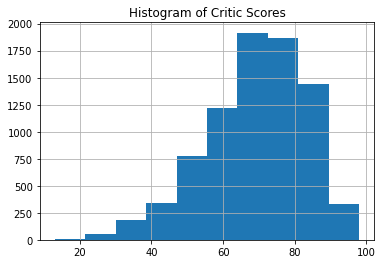

In [48]:
game_data['critic_score'].hist();
plt.title('Histogram of Critic Scores')
plt.show()

In [49]:
#Change both critic_score to type int64 since it has NaN values
game_data['critic_score'] = game_data['critic_score'].astype('Int64')


In [50]:
game_data.groupby('critic_score')['name'].count() #Now we see Integers and not floats for this metric

critic_score
13     1
17     1
19     6
20     3
21     1
      ..
94    37
95    16
96    18
97    11
98     4
Name: name, Length: 82, dtype: int64

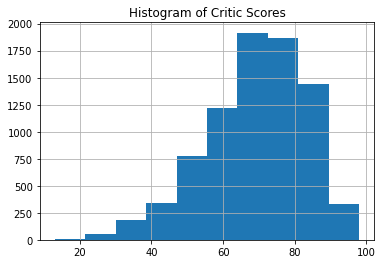

In [51]:
game_data['critic_score'].hist();
plt.title('Histogram of Critic Scores')
plt.show()

In [52]:
#Change both critic_score to type int64 since it has NaN values
game_data['user_score'] = game_data['user_score'].astype('float64')


In [53]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16541 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  ttl_sales        16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 2.2+ MB


All data types look correct now and we verified all NaN values and are now comfortable to move on to data analysis. 

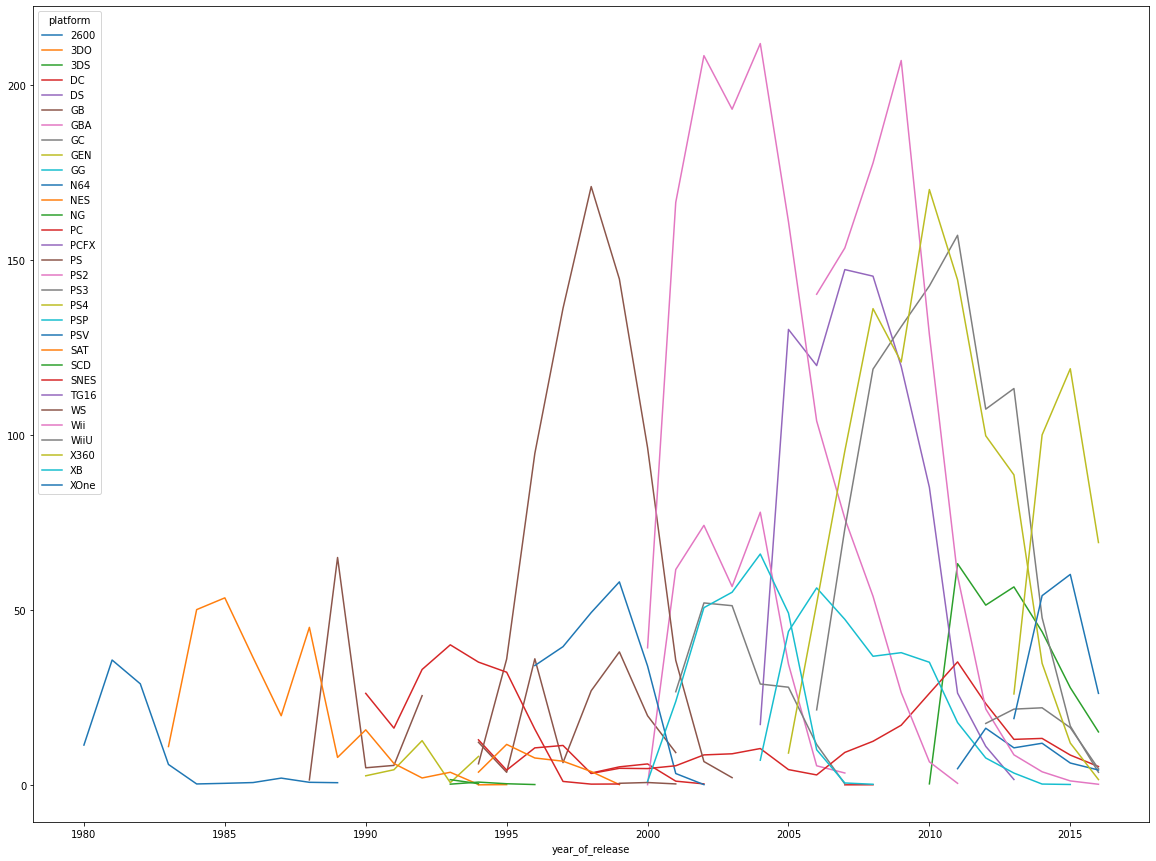

In [54]:
y = game_data.pivot_table(index='year_of_release',columns='platform',values='ttl_sales',aggfunc = 'sum').plot.line(figsize=(20,15))
plt.show()

This line graph is crowded and I would never use it in a presentation but it is useful to see when when the data for sales started and some of the length of time that old platforms had. For example we see that the 2600 had sale from 1980 till 1990 (10 years) then the sales went to zero. 

Lets count the number of different release_of_year by platform. 

In [55]:
platforms_years_sales = game_data.pivot_table(index='year_of_release',columns='platform',values='ttl_sales', aggfunc = ['sum',])

In [56]:
platforms_years_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1980 to 2016
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (sum, 2600)  11 non-null     float64
 1   (sum, 3DO)   2 non-null      float64
 2   (sum, 3DS)   8 non-null      float64
 3   (sum, DC)    7 non-null      float64
 4   (sum, DS)    11 non-null     float64
 5   (sum, GB)    13 non-null     float64
 6   (sum, GBA)   8 non-null      float64
 7   (sum, GC)    7 non-null      float64
 8   (sum, GEN)   5 non-null      float64
 9   (sum, GG)    1 non-null      float64
 10  (sum, N64)   8 non-null      float64
 11  (sum, NES)   12 non-null     float64
 12  (sum, NG)    4 non-null      float64
 13  (sum, PC)    26 non-null     float64
 14  (sum, PCFX)  1 non-null      float64
 15  (sum, PS)    10 non-null     float64
 16  (sum, PS2)   12 non-null     float64
 17  (sum, PS3)   11 non-null     float64
 18  (sum, PS4)   4 non-null      float64
 19  (sum, PSP)

In [57]:
platforms_years_sales.columns

MultiIndex([('sum', '2600'),
            ('sum',  '3DO'),
            ('sum',  '3DS'),
            ('sum',   'DC'),
            ('sum',   'DS'),
            ('sum',   'GB'),
            ('sum',  'GBA'),
            ('sum',   'GC'),
            ('sum',  'GEN'),
            ('sum',   'GG'),
            ('sum',  'N64'),
            ('sum',  'NES'),
            ('sum',   'NG'),
            ('sum',   'PC'),
            ('sum', 'PCFX'),
            ('sum',   'PS'),
            ('sum',  'PS2'),
            ('sum',  'PS3'),
            ('sum',  'PS4'),
            ('sum',  'PSP'),
            ('sum',  'PSV'),
            ('sum',  'SAT'),
            ('sum',  'SCD'),
            ('sum', 'SNES'),
            ('sum', 'TG16'),
            ('sum',   'WS'),
            ('sum',  'Wii'),
            ('sum', 'WiiU'),
            ('sum', 'X360'),
            ('sum',   'XB'),
            ('sum', 'XOne')],
           names=[None, 'platform'])

In [58]:
platforms_years_sales['sum',  'PS4']

year_of_release
1980       NaN
1981       NaN
1982       NaN
1983       NaN
1984       NaN
1985       NaN
1986       NaN
1987       NaN
1988       NaN
1989       NaN
1990       NaN
1991       NaN
1992       NaN
1993       NaN
1994       NaN
1995       NaN
1996       NaN
1997       NaN
1998       NaN
1999       NaN
2000       NaN
2001       NaN
2002       NaN
2003       NaN
2004       NaN
2005       NaN
2006       NaN
2007       NaN
2008       NaN
2009       NaN
2010       NaN
2011       NaN
2012       NaN
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: (sum, PS4), dtype: float64

We can see that PS4 only began selling games in 2013.

In [59]:
platforms_years_sales.loc[2016, :]>0 #Lets see which platforms had any sales in 2016.

     platform
sum  2600        False
     3DO         False
     3DS          True
     DC          False
     DS          False
     GB          False
     GBA         False
     GC          False
     GEN         False
     GG          False
     N64         False
     NES         False
     NG          False
     PC           True
     PCFX        False
     PS          False
     PS2         False
     PS3          True
     PS4          True
     PSP         False
     PSV          True
     SAT         False
     SCD         False
     SNES        False
     TG16        False
     WS          False
     Wii          True
     WiiU         True
     X360         True
     XB          False
     XOne         True
Name: 2016, dtype: bool

From above query we can see that many platforms had zero sales in 2016 and are likely discontinued. We see very old platforms like 2600 that lasted about 10 years before disappearing. There are also older generation platforms like the original Play Station or PS or even PS2 that no longer has any sales on ICE. Nintendo 64 or N64 is another example of a platform that no longer has any sales in 2016. 

In [60]:
platforms_years_count = game_data.pivot_table(index='platform',values='ttl_sales', aggfunc = ['count'])

In [61]:
platforms_years_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2600 to XOne
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   (count, ttl_sales)  31 non-null     int64
dtypes: int64(1)
memory usage: 496.0+ bytes


In [62]:
game_data.groupby('platform')['ttl_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: ttl_sales, dtype: float64

We can see that 2008 was the year that ICE had the highest sales and it is also the same year that it had the most individual games launched and listed on it's website for sale. It might be worthwhile to see if ICE can list more games even if they are not the big blockbuster games but this might help with the downtrend that ICE has seen in sales since 2008 until today.

In [63]:
#Lets see how many years each platform had sales. NaN valsue represent years there were no sales and there are 37 years.
report = platforms_years_sales.isna().sum().to_frame() # Usisng the code that you shared to take a quick look at NaNn and missing values.
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / platforms_years_sales.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)


missing_values  % of total
    platform                            
sum PCFX                  36        0.97
    TG16                  36        0.97
    GG                    36        0.97
    SCD                   35        0.95
    3DO                   35        0.95
    WS                    34        0.92
    XOne                  33        0.89
    PS4                   33        0.89
    NG                    33        0.89
    WiiU                  32        0.86
    GEN                   32        0.86
    SAT                   31        0.84
    PSV                   31        0.84
    GC                    30        0.81
    DC                    30        0.81
    GBA                   29        0.78
    3DS                   29        0.78
    N64                   29        0.78
    XB                    28        0.76
    SNES                  27        0.73
    PS                    27        0.73
    PS3                   26        0.70
    Wii                   26        0.70
    DS                    26        0.70
    2600                  26        0.70
    PSP                   25        0.68
    PS2                   25        0.68
    NES                   25        0.68
    X360                  25        0.68
    GB                    24        0.65
    PC                    11        0.30

In [64]:
report.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, ('sum', '2600') to ('sum', 'XOne')
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   missing_values  31 non-null     int64  
 1   % of total      31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.0+ KB


In [65]:
report['years'] = 37 - report['missing_values'].sort_values() #I'm doing this to get the average legth of time a platform has sales

In [66]:
report.sort_values('years') # Lets see how many years each platform had sales.

missing_values  % of total  years
    platform                                   
sum GG                    36        0.97      1
    PCFX                  36        0.97      1
    TG16                  36        0.97      1
    3DO                   35        0.95      2
    SCD                   35        0.95      2
    WS                    34        0.92      3
    NG                    33        0.89      4
    PS4                   33        0.89      4
    XOne                  33        0.89      4
    WiiU                  32        0.86      5
    GEN                   32        0.86      5
    SAT                   31        0.84      6
    PSV                   31        0.84      6
    GC                    30        0.81      7
    DC                    30        0.81      7
    N64                   29        0.78      8
    GBA                   29        0.78      8
    3DS                   29        0.78      8
    XB                    28        0.76      9
    SNES                  27        0.73     10
    PS                    27        0.73     10
    PS3                   26        0.70     11
    Wii                   26        0.70     11
    DS                    26        0.70     11
    2600                  26        0.70     11
    PS2                   25        0.68     12
    NES                   25        0.68     12
    X360                  25        0.68     12
    PSP                   25        0.68     12
    GB                    24        0.65     13
    PC                    11        0.30     26

In [67]:
report.describe()

,missing_values,% of total,years
count,31.000000,31.000000,31.000000
mean,29.193548,0.788710,7.806452
std,5.088676,0.136595,5.088676
min,11.000000,0.300000,1.000000
25%,26.000000,0.700000,4.000000
50%,29.000000,0.780000,8.000000
75%,33.000000,0.890000,11.000000
max,36.000000,0.970000,26.000000


We can see from above that both mean and the median are around 8 years. So the average platform lasts around 8 years with sales on the Ice website. 

In [68]:
game_data.query('platform == "PCFX"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996,Role-Playing,0.0,0.0,0.03,0.0,<NA>,NaN,NaN,0.03


In [69]:
game_data.drop(14634, axis = 0, inplace = True) 
#dropping platform PCFX since it only had one year of sales in 1996 and sales were minimal and only in Japan

In [70]:
#Lets look at TG16 which also only had one year of sales
game_data.query('platform == "TG16"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
9223,Doukyuusei,TG16,1995,Adventure,0.0,0.0,0.14,0.0,<NA>,NaN,NaN,0.14
15633,Ginga Fukei Densetsu: Sapphire,TG16,1995,Shooter,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [71]:
#Sales also minimal only in Japan and only 2 games launched in 1995 I'm dropping these rows for this platform as well.
game_data.drop([9223,15633], axis = 0, inplace = True) 

In [72]:
game_data.query('platform == "TG16"') #2 platforms have been removed with minimal sales and outdated information

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales


In [73]:
game_data.query('platform == "GG"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
13571,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,0.0,0.0,0.04,0.0,<NA>,NaN,NaN,0.04


In [74]:
game_data.drop(13571, axis = 0, inplace = True) #Dropping GG

In [75]:
#SCD
game_data.query('platform == "SCD"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
1263,Sonic CD,SCD,1993,Platform,1.0,0.36,0.09,0.05,<NA>,NaN,NaN,1.50
9008,Shining Force CD,SCD,1994,Strategy,0.0,0.00,0.14,0.00,<NA>,NaN,NaN,0.14
11781,Formula One World Championship: Beyond the Limit,SCD,1994,Racing,0.0,0.00,0.07,0.00,<NA>,NaN,NaN,0.07
12612,Record of Lodoss War: Eiyuu Sensou,SCD,1994,Role-Playing,0.0,0.00,0.06,0.00,<NA>,NaN,NaN,0.06
13010,Game no Kanzume Vol 2,SCD,1994,Misc,0.0,0.00,0.05,0.00,<NA>,NaN,NaN,0.05
13489,Game no Kanzume Vol 1,SCD,1994,Misc,0.0,0.00,0.04,0.00,<NA>,NaN,NaN,0.04


In [76]:
game_data.drop([1263,9008,11781,12612,13010,13489], axis = 0, inplace = True) #Dropping SCD

In [77]:
#3DO
game_data.query('platform == "3DO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
12663,Policenauts,3DO,1995,Adventure,0.0,0.0,0.06,0.0,<NA>,NaN,NaN,0.06
15076,Bust-A-Move,3DO,1994,Puzzle,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02
15560,Sotsugyou II: Neo Generation Special,3DO,1995,Simulation,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [78]:
game_data.drop([12663,15076,15560], axis = 0, inplace = True) #Dropping SCD

In [79]:
game_data.query('platform == "3DO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales


In [80]:
#WS
game_data.query('platform == "WS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
3926,Final Fantasy,WS,2000,Role-Playing,0.0,0.0,0.51,0.0,<NA>,NaN,NaN,0.51
6110,Digimon Adventure: Anode Tamer,WS,1999,Role-Playing,0.0,0.0,0.28,0.0,<NA>,NaN,NaN,0.28
6650,Final Fantasy II,WS,2001,Role-Playing,0.0,0.0,0.25,0.0,<NA>,NaN,NaN,0.25
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999,Role-Playing,0.0,0.0,0.18,0.0,<NA>,NaN,NaN,0.18
8294,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000,Strategy,0.0,0.0,0.17,0.0,<NA>,NaN,NaN,0.17
14224,SD Gundam G Generation: Gather Beat 2,WS,2001,Strategy,0.0,0.0,0.03,0.0,<NA>,NaN,NaN,0.03


In [81]:
game_data.drop([3926, 6110, 8039, 6650, 8294, 14224], axis = 0, inplace = True) #Dropping WS

In [82]:
game_data.query('platform == "WS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales


In [83]:
game_data.groupby('platform')['year_of_release'].count() #Printing data after dropping a handful of platforms that were not significant to the overall data or for forecasting 2017 potential profits.

platform
2600     117
3DS      514
DC        52
DS      2125
GB        97
GBA      813
GC       551
GEN       27
N64      318
NES       98
NG        12
PC       967
PS      1191
PS2     2140
PS3     1313
PS4      392
PSP     1201
PSV      429
SAT      173
SNES     239
Wii     1299
WiiU     147
X360    1244
XB       816
XOne     247
Name: year_of_release, dtype: int64

In [84]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16694 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16694 non-null  object 
 1   platform         16694 non-null  object 
 2   year_of_release  16522 non-null  Int64  
 3   genre            16694 non-null  object 
 4   na_sales         16694 non-null  float64
 5   eu_sales         16694 non-null  float64
 6   jp_sales         16694 non-null  float64
 7   other_sales      16694 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  ttl_sales        16694 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


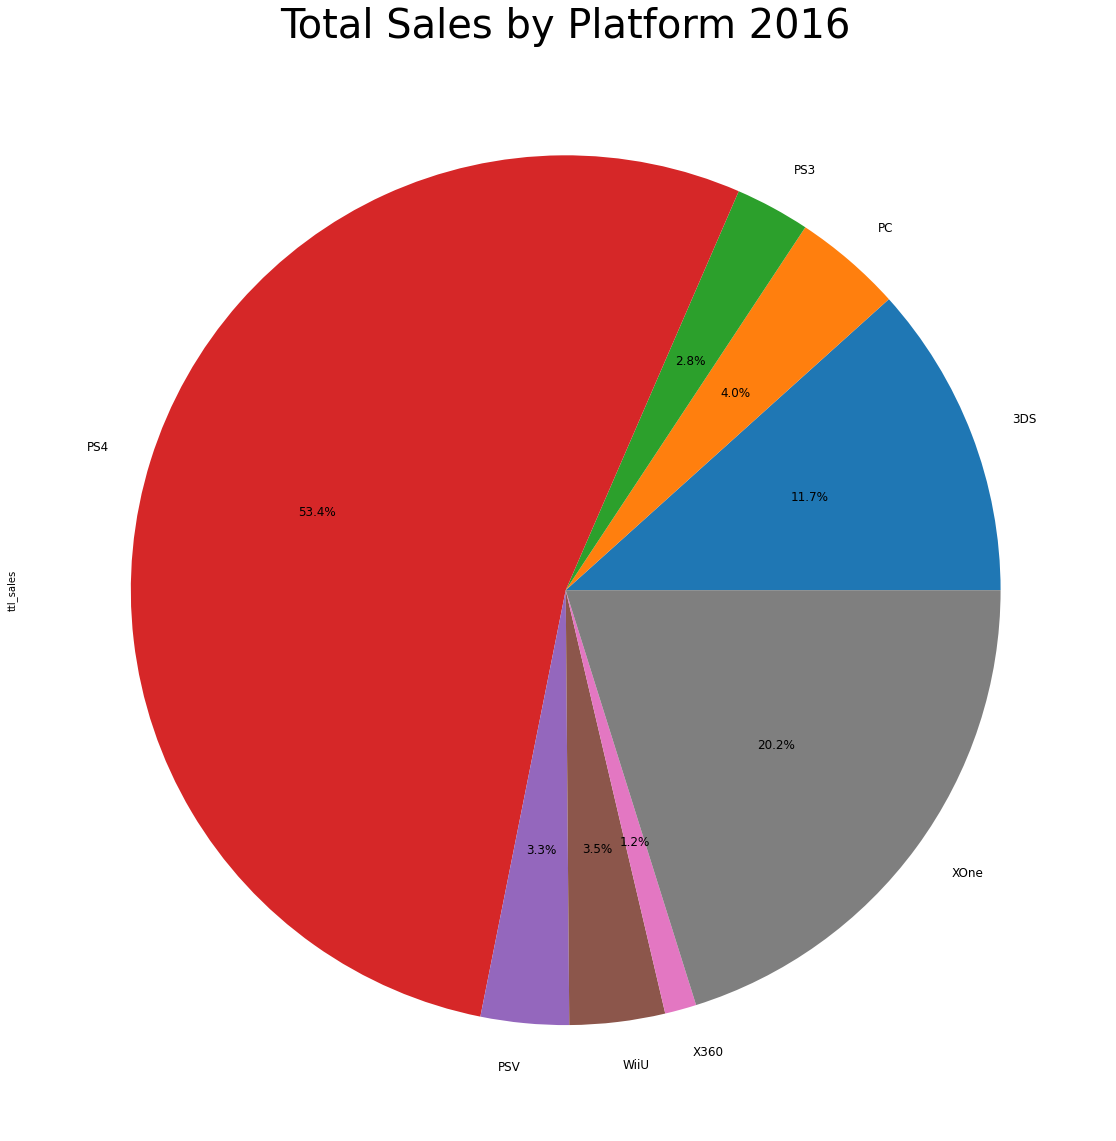

In [85]:
game_data[(game_data['year_of_release']==2016) & (game_data['ttl_sales']>0) & (game_data['platform']!='Wii') ].groupby('platform')['ttl_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(20,20),fontsize=12)
plt.title('Total Sales by Platform 2016',fontsize=40)
plt.show()




In [86]:
top_3 = 53.4 + 11.7 + 20.2
print(top_3) # printing the total market share of sales for PS4, XOne and 3DS combined in 2016. 


85.3


We see these top 3 platforms (PS4, XOne and 3DSare) constitute over 85% of sales in 2016. Following the 80/20 rule we know that we should put the majority of resources into these platforms if we want to increase sales which I would argue is the number one determining factor for success of a game or platform from ICE's perspective. 


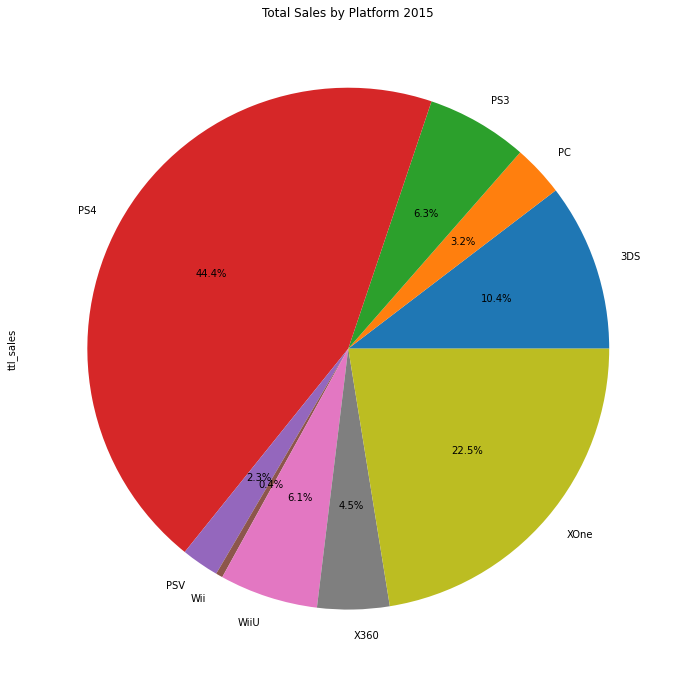

In [87]:
game_data[(game_data['year_of_release']==2015) & (game_data['ttl_sales']>0) & (game_data['platform']!='PSP')].groupby('platform')['ttl_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(12,12))
plt.title('Total Sales by Platform 2015')
plt.show()

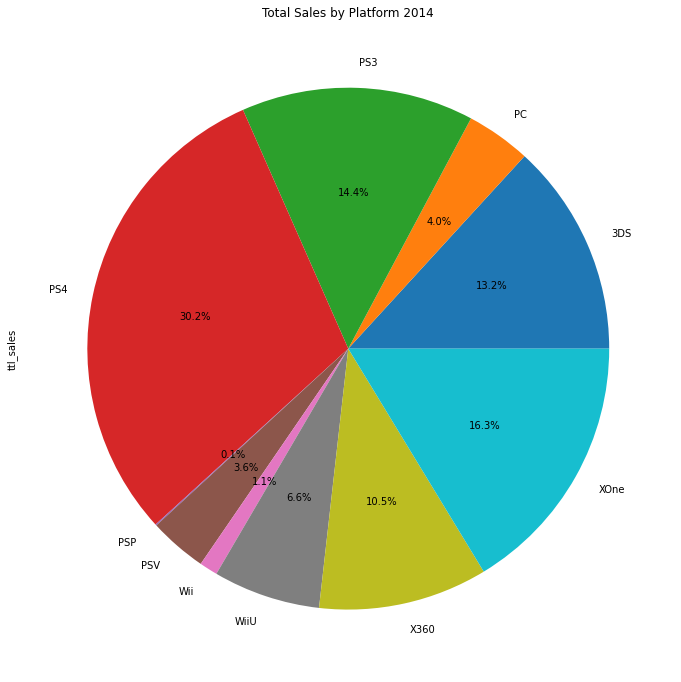

In [88]:
game_data[(game_data['year_of_release']==2014) & (game_data['ttl_sales']>0)].groupby('platform')['ttl_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(12,12))
plt.title('Total Sales by Platform 2014')
plt.show()

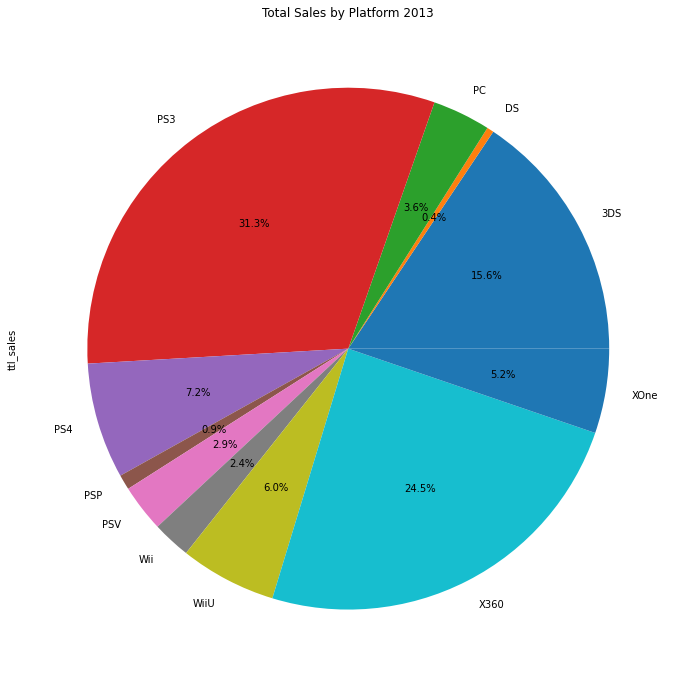

In [89]:
game_data[(game_data['year_of_release']==2013) & (game_data['ttl_sales']>0)].groupby('platform')['ttl_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(12,12))
plt.title('Total Sales by Platform 2013')
plt.show()

Looking at the total sales with the 3 pie charts above by platform we can see that PS4 has been consistently growing sales from 2014-2016. We have to keep in mind that 2016 does not have complete results for the full year so we look at 2 years prior to make predictions into 2017. The PS3 sales are getting smaller while PS4 next generation platform takes over sales of new games. Same can be said for XOne and X360. The X360 sales drop year over year as XOne sales grow. PC sales remain quite consistent since PCs are not truly a game console. PC is a personal computer that people upgrade as they see fit and games are rolled out every year for PCs so it is likely to remain quite constant and a current percentage of sales in 2017. Into 2017 I would recommend spending the most amount of time and money on promoting new games on XOne and PS4. PS4 only has 3 years of sales so it is at the beginning of it's life-cycle. On the other hand PS3 is on it's 12 year of sales so it is at the end of it life-cycle. WiiU is also growing in sales as it takes over the Wii console previous generation. On the hand held side PSV is the direct competitor to 3DS. 3DS has performed much better in terms of total sales and has remained quite consistent in their percentage of the pie over the last 3 years.  In short I would concentrate all advertisement and promotion dollars mainly to  XOne and PS4 since they are in there prime and going to the most profitable years of their live cycles. On the hand-held side I would focus on 3DS since it has much better sales than PSV. If there is some money left over I would then focus on PC. I wouldn't spend much on WiiU since it's sales seem to be declining so far in 2016 compared to 2015.

I decided to only go back to 2013 since the 2 current dominant platforms (PS4 and XOne) did not have any sales in 2012 and years earlier than 2012. I will create data with only games released from 2013 to present to do a deep dive to set forecasts for 2017.

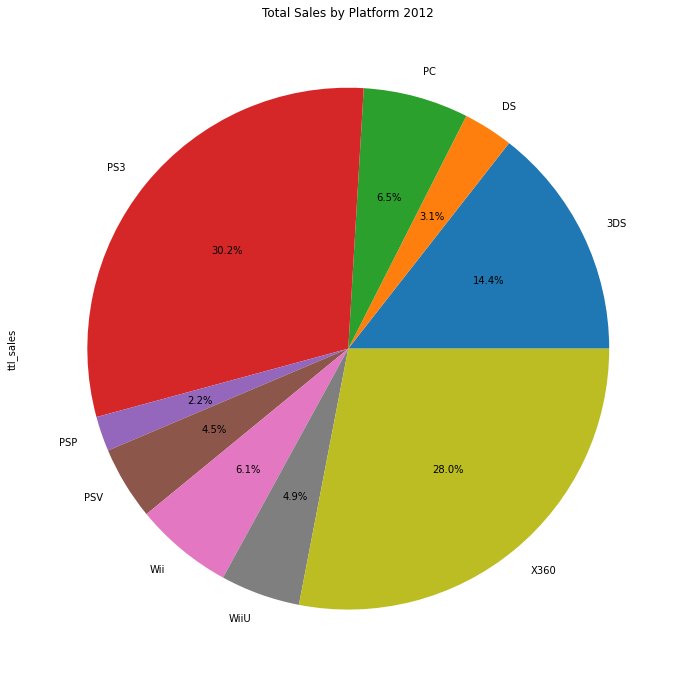

In [90]:
game_data[(game_data['year_of_release']==2012) & (game_data['ttl_sales']>0)].groupby('platform')['ttl_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(12,12))
plt.title('Total Sales by Platform 2012')
plt.show()

In [91]:
top_games = game_data[(game_data['year_of_release']>=2013) & (game_data['ttl_sales']>0)]

In [92]:
top_games.shape # We now have only about 2200 rows of data.

(2237, 12)

In [93]:
top_games[top_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales


In [94]:
top_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   Int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    Int64  
 9   user_score       1195 non-null   float64
 10  rating           1259 non-null   object 
 11  ttl_sales        2237 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.6+ KB


In [95]:
top_games['year_of_release'] = top_games['year_of_release'].astype('int')

/tmp/ipykernel_41/72572065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_games['year_of_release'] = top_games['year_of_release'].astype('int')


In [96]:
top_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    Int64  
 9   user_score       1195 non-null   float64
 10  rating           1259 non-null   object 
 11  ttl_sales        2237 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 229.4+ KB


In [97]:
top_games.query('year_of_release==2016').sort_values('ttl_sales',ascending=False).head(20) #Top 20 list of games in 2016 for total sales accross all markets.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,<NA>,NaN,NaN,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80,7.0,M,3.80
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78,3.1,M,2.42
708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76,6.3,M,2.26
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87,8.2,M,2.25


In [98]:
#Now lets look at all top games launched since 2013
top_games.sort_values('ttl_sales',ascending=False).head(20) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,<NA>,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


[Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.]


In [99]:
top_games.groupby('platform')['ttl_sales'].sum().sort_values()

platform
DS        1.54
PSP       3.74
Wii      13.66
PSV      32.99
PC       40.06
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: ttl_sales, dtype: float64

We will also drop DS, PSP and Wii from our analysis and data frame since their sales are not material.

In [100]:
top_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    Int64  
 9   user_score       1195 non-null   float64
 10  rating           1259 non-null   object 
 11  ttl_sales        2237 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 229.4+ KB


In [101]:
top_games = top_games.query(' platform  not in ("DS","PSP","Wii") ')

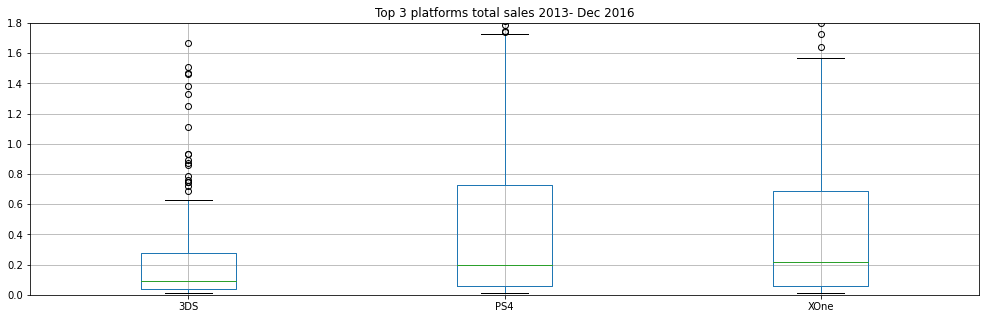

In [102]:
#The below 3 platforms made up 86% of total sales for 2016 so most of our attention should turn to them for guidance into 2017.
top_games.query('platform in ("PS4","XOne","3DS")').pivot_table(index = 'name', values = 'ttl_sales', columns = 'platform', aggfunc = 'sum').boxplot(figsize= (17,5))

plt.title('Top 3 platforms total sales 2013- Dec 2016')
plt.ylim(0,1.8)


plt.show()


We can see from the boxplots that of the 3 dominant platforms since 2013 to date PS4 and XOne have a higher median total sales than the hand-held 3DS. This makes sense since the games for 3DS are normally cheaper than for the major platforms. 

In [103]:
top_games.query('platform in ("PS4","XOne","3DS")').pivot_table(
    index = 'name', values = 'ttl_sales', columns = 'platform', aggfunc = 'sum').describe()

platform,3DS,PS4,XOne
count,303.000000,392.000000,247.000000
mean,0.472772,0.801378,0.645020
std,1.381347,1.609456,1.036139
min,0.010000,0.010000,0.010000
25%,0.040000,0.060000,0.060000
50%,0.090000,0.200000,0.220000
75%,0.280000,0.730000,0.685000
max,14.600000,14.630000,7.390000


In [104]:
top_games.query('platform in ("PS4")').ttl_sales.describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: ttl_sales, dtype: float64

In [105]:
top_games.query('platform in ("XOne")').ttl_sales.describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: ttl_sales, dtype: float64

0.060000000000000005
0.685
The upper whisker is: 1.6225


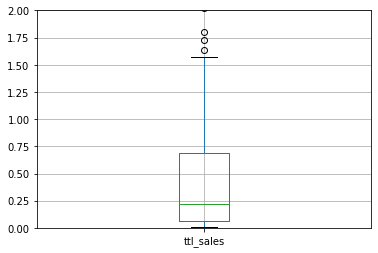

In [106]:
#Drawing a boxplot for XOne sales to identify outliers for sales. Outliers in this case are blockbuster games with huge sales.
Q1 = top_games.query('platform == "XOne"').ttl_sales.quantile(0.25)
print(Q1)
Q3 = top_games.query('platform == "XOne" ').ttl_sales.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
Q4 = Q3+(1.5*IQR)
print(f'The upper whisker is: {Q4}') #Determine the upper whisker actual number.
plt.ylim(0,2)


top_games.query('platform == "XOne"').boxplot('ttl_sales')
plt.show()

0.060000000000000005
0.73
The upper whisker is: 1.7349999999999999


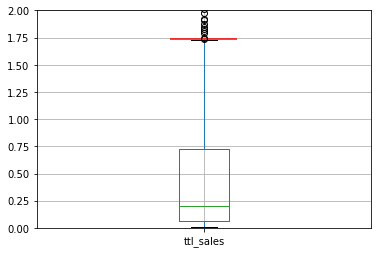

In [107]:
#Drawing a boxplot for PS4 sales to identify outliers for sales.
Q1 = top_games.query('platform == "PS4"').ttl_sales.quantile(0.25)
print(Q1)
Q3 = top_games.query('platform == "PS4" ').ttl_sales.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
Q4 = Q3+(1.5*IQR)
print(f'The upper whisker is: {Q4}') #Determine the whisker actual number.
plt.ylim(0,2)


top_games.query('platform == "PS4"').boxplot('ttl_sales')
plt.hlines(y=Q4,xmin=0.9, xmax=1.1, color='red') # Draw a red line at uper whisker. 
plt.show()

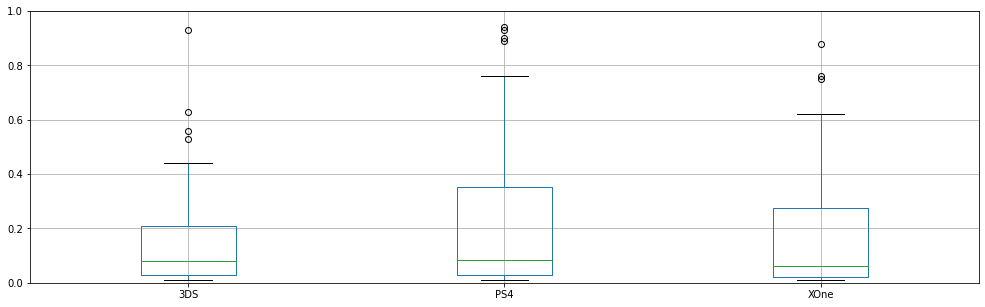

In [108]:
#The below 3 platforms made up 86% of total sales for 2016 so most of our attention should turn to them for guidance into 2017.
top_games.query('platform in ("PS4","XOne","3DS") & year_of_release==2016').pivot_table(index = 'name', values = 'ttl_sales', columns = 'platform', aggfunc = 'sum').boxplot(figsize= (17,5))
plt.ylim(0,1)

plt.show()

It is interesting to see that the median total sales for 3DS actually remained the same (than all sales since 2013) but for PS4 and XOne medians decreased and now all 3 major platforms have similar median total sales with XOne actually is a bit lower than 3DS. If we look at the describe method below we can see that both the mean and median sales for XOne are the lowest of the 3 major platforms. 

In [109]:
top_games.query('platform in ("PS4","XOne","3DS") & year_of_release==2016').pivot_table(
    index = 'name', values = 'ttl_sales', columns = 'platform', aggfunc = 'sum').describe()

platform,3DS,PS4,XOne
count,46.000000,164.000000,87.000000
mean,0.329130,0.422256,0.300575
std,1.058533,0.968877,0.549133
min,0.010000,0.010000,0.010000
25%,0.030000,0.030000,0.020000
50%,0.080000,0.085000,0.060000
75%,0.210000,0.352500,0.275000
max,7.140000,7.600000,2.650000


It is surprising to see the total sales of XOne being less on average than 3DS in 2016 since XOne had a higher median and mean sales if we look at all sales since 2013. 

In [110]:
top_games.query('platform == "PS4" & year_of_release==2016').ttl_sales.describe()

count    164.000000
mean       0.422256
std        0.968877
min        0.010000
25%        0.030000
50%        0.085000
75%        0.352500
max        7.600000
Name: ttl_sales, dtype: float64

0.03
0.35250000000000004
The upper whisker is: 0.83625


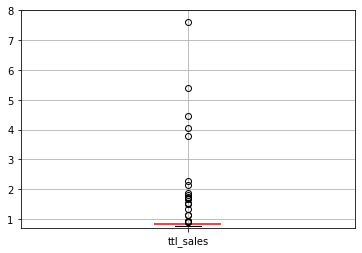

In [111]:
#Dawing a boxplot for PS4 for 2016 sale only.
Q1 = top_games.query('platform == "PS4" & year_of_release==2016').ttl_sales.quantile(0.25)
print(Q1)
Q3 = top_games.query('platform == "PS4" & year_of_release==2016').ttl_sales.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
Q4 = Q3+(1.5*IQR)
print(f'The upper whisker is: {Q4}') #Determine the whisker actual number.
plt.ylim(0,2)


#top_games.query('platform == "PS4" & year_of_release==2016').boxplot('ttl_sales')



top_games.query('platform == "PS4" & year_of_release==2016').boxplot('ttl_sales')

plt.hlines(y=Q4,xmin=0.9, xmax=1.1, color='red') # Draw a red line at uper whisker. 
plt.ylim(.7,8)


plt.show()

Outliers are generally "bad" data or are discarded but in this case the games that are outliers in the top_games data are the games that we should focus on for sales especially if they launched in 2016 or are due for a new updated release in 2017. These are games with the highest amount of sales in 2016 and this should carry to some degree into 2017. Lets start by looking at outliers for PS4 by name title and release year. The upper whisker for PS4 total sales for 2016 is at about .8 that means any games that had more sales than that were superstars when it comes to sales.


Lets take a look at some of the game names and titles:

In [112]:
top_games.query('platform == "PS4" & year_of_release==2016 & ttl_sales>.8')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80,7.0,M,3.80
708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76,6.3,M,2.26
767,Overwatch,PS4,2016,Shooter,0.81,0.85,0.15,0.33,90,6.1,T,2.14
921,NBA 2K17,PS4,2016,Sports,1.25,0.27,0.02,0.34,88,6.7,E,1.88
968,Mafia III,PS4,2016,Action,0.42,1.08,0.03,0.28,68,5.1,M,1.81
1007,Madden NFL 17,PS4,2016,Sports,1.25,0.17,0.00,0.32,82,4.9,E,1.74


The game FIFA 17 (soccer or football game) actually has the number 17 meaning (2017) so it probably launched at the end of 2016 possibly last quarter to take advantage of the Christmas sales. It is doing extremely well with 7.6 Million USD in sales across all markets. My first allocation for advertising for ICE would be for this game(and also to at least the top 10 on the list above) on the PS4 platform. Now lets look at the XOne platform and lets check outliers. 


0.02
0.275
The upper whisker is: 0.6575


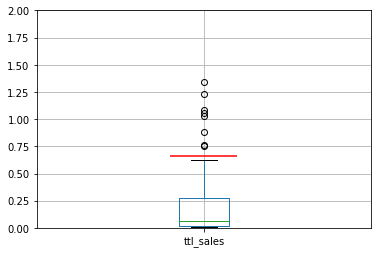

In [113]:
#Boxplot for 2016 XOne sales
Q1 = top_games.query('platform == "XOne" & year_of_release==2016').ttl_sales.quantile(0.25)
print(Q1)
Q3 = top_games.query('platform == "XOne" & year_of_release==2016').ttl_sales.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
Q4 = Q3+(1.5*IQR)
print(f'The upper whisker is: {Q4}') #Determine the whisker actual number.
plt.ylim(0,2)


top_games.query('platform == "XOne" & year_of_release==2016').boxplot('ttl_sales')

plt.hlines(y=Q4,xmin=0.9, xmax=1.1, color='red') # Draw a red line at uper whisker. 


plt.show()

Note: I asked the tutors on Slack why my red line was not aligning with the top black whisker and Anthony told me it must be a rounding error 

In [114]:
top_games.query('platform == "XOne" & year_of_release==2016 & ttl_sales>.65')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.0,0.17,84,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.0,0.22,78,3.1,M,2.42
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.0,0.20,87,8.2,M,2.25
758,Tom Clancy's The Division,XOne,2016,Shooter,1.29,0.68,0.0,0.20,80,6.9,M,2.17
1439,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.0,0.12,84,6.2,M,1.34
1615,Madden NFL 17,XOne,2016,Sports,1.08,0.02,0.0,0.13,83,5.9,E,1.23
1904,Forza Horizon 3,XOne,2016,Racing,0.42,0.58,0.0,0.08,91,7.4,E,1.08
1948,Overwatch,XOne,2016,Shooter,0.63,0.33,0.0,0.10,91,5.6,T,1.06
2024,NBA 2K17,XOne,2016,Sports,0.86,0.06,0.0,0.11,90,6.2,E,1.03
2367,Far Cry: Primal,XOne,2016,Action,0.47,0.33,0.0,0.08,77,6.4,M,0.88


We can see that many of the top performers are the same for both platforms so adds could be combined stating what platforms the title names are available on. We will also check the hand-held and I bet there are some games that are also named the same there in the top performers by sales. 


XOne's top performer was also FIFA 17 also was the top performer for XOne platform with 2.65 Million USD in total sales across all markets. The best market for this game for both XOne and PS4 was the eu_sales so special attention should be given to advertising FIFA 17 in the European market in 2017. Other top seller would be Call of Duty: Infinite Warfare (and any sequels in 2017), Battlefield 1. These are the 3 top games that are available on both PS4 and XOne. Any sequels to these games have a high probability of having very strong sales and should be allocated a lot of marketing dollars to promote them on both platforms in the North American Market. 

In [115]:
top_games.groupby('year_of_release')['ttl_sales'].sum()

year_of_release
2013    348.60
2014    327.54
2015    266.72
2016    129.76
Name: ttl_sales, dtype: float64

The FIFA 17 game alone account for 7.6+2.65 = 10.25 of total sales. As a percentage that is almost 8% of total 2016 sales.

In [116]:
x = 10.25/129.76
print(x*100)

7.899198520345253


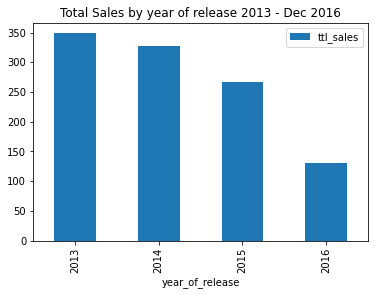

In [117]:
#Lets graph the decline of sales over the year to show a visual trend.

top_games.groupby('year_of_release')['ttl_sales'].sum().to_frame().sort_values('year_of_release').plot(kind='bar')
plt.title('Total Sales by year of release 2013 - Dec 2016')
plt.show()

Granted the month with probably highest sales which is December (Christmas and Holiday season) is not yet completely accounted for for 2016 but the sales for each year are declining and 2016 looks like it will come in lower than 2015 as well. 

0.03
0.21
The upper whisker is: 0.48


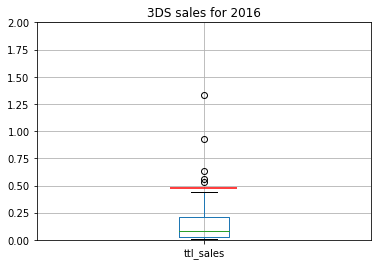

In [118]:
Q1 = top_games.query('platform == "3DS" & year_of_release==2016').ttl_sales.quantile(0.25)
print(Q1)
Q3 = top_games.query('platform == "3DS" & year_of_release==2016').ttl_sales.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
Q4 = Q3+(1.5*IQR)
print(f'The upper whisker is: {Q4}') #Determine the whisker actual number.
plt.ylim(0,2)

top_games.query('platform == "3DS" & year_of_release==2016').boxplot('ttl_sales')

plt.hlines(y=Q3+(1.5*IQR),xmin=0.9, xmax=1.1, color='red') # Draw a red line at uper whisker. 
plt.title('3DS sales for 2016')
plt.show()

In [119]:
top_games.query('platform == "3DS" & year_of_release==2016 & ttl_sales>.48')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,<NA>,NaN,NaN,7.14
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,<NA>,NaN,NaN,1.33
2219,Kirby: Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81,8.7,E,0.93
3177,Dragon Quest Monsters Joker 3,3DS,2016,Role-Playing,0.00,0.00,0.63,0.00,<NA>,NaN,NaN,0.63
3593,Yokai Sangokushi,3DS,2016,Action,0.00,0.00,0.56,0.00,<NA>,NaN,NaN,0.56
3788,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016,Action,0.05,0.21,0.25,0.02,<NA>,NaN,NaN,0.53


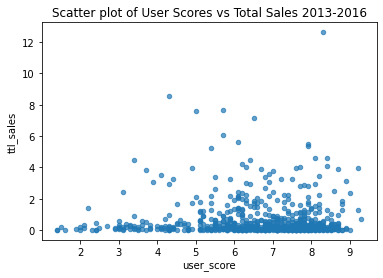

In [120]:
top_games.query('platform in ("3DS", "XOne", "PS4","PC",)').plot(x='user_score', y = 'ttl_sales', kind='scatter',alpha = .7) 
plt.title('Scatter plot of User Scores vs Total Sales 2013-2016')
plt.show()

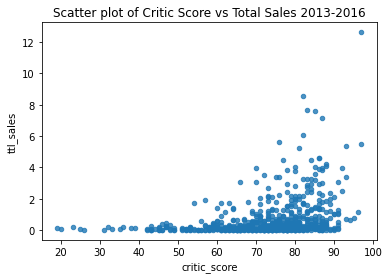

In [121]:
top_games.query('platform in ("3DS", "XOne", "PS4","PC",)').plot(x='critic_score', y = 'ttl_sales', kind='scatter',alpha = .8)
plt.title('Scatter plot of Critic Score vs Total Sales 2013-2016')
plt.show()

To smooth thing out lets try the median price. We are using median since the Standard Deviation is quite significant and median and mean are also quite different. We saw that there are many outliers pulling the mean much higher than the median for all major platforms. 

(0.0, 24.0)

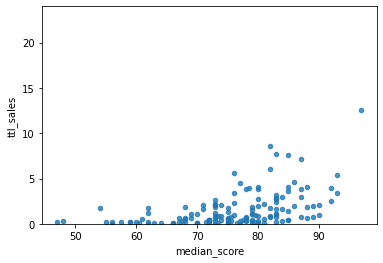

In [122]:

#Checking correlation of total sales to critic_scores.
top_games['critic_score'] = top_games['critic_score'].astype('float64') #Couldn't perform a median on type Int64 so changing to float.
median_PS4_critic_score = top_games.query('platform == "PS4"').pivot_table(
    index='ttl_sales', values='critic_score', aggfunc='median'
)

median_PS4_critic_score.columns = ['median_score']

median_PS4_critic_score['ttl_sales']= median_PS4_critic_score.index
median_PS4_critic_score.plot(x='median_score', y = 'ttl_sales', kind='scatter',alpha = .8) 
plt.ylim(0,24)

In [123]:
median_PS4_critic_score

,median_score,ttl_sales
ttl_sales,,
0.01,56.0,0.01
0.02,62.0,0.02
0.03,73.0,0.03
0.04,77.0,0.04
0.05,66.0,0.05
...,...,...
7.17,87.0,7.17
7.60,85.0,7.60
7.66,83.0,7.66


In [124]:
print(median_PS4_critic_score.corr())

              median_score  ttl_sales
median_score      1.000000   0.486952
ttl_sales         0.486952   1.000000


We see a moderate positive correlation between ttl_sales in USD and the median score the game receives on the PS4 platform. 

(0.0, 24.0)

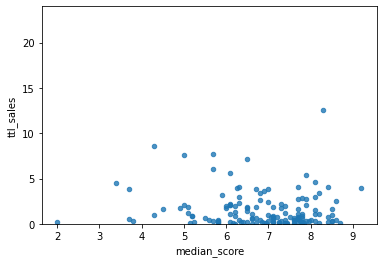

In [125]:
#Checking correlation of total sales to user_scores.
top_games['user_score'] = top_games['user_score'].astype('float64') #Couldn't perform a median on type Int64 so changing to float.
median_PS4_user = top_games.query('platform == "PS4"').pivot_table(
    index='ttl_sales', values='user_score', aggfunc='median'
)

median_PS4_user.columns = ['median_score']

median_PS4_user['ttl_sales']= median_PS4_user.index
median_PS4_user.plot(x='median_score', y = 'ttl_sales', kind='scatter',alpha = .8) 
plt.ylim(0,24)

In [126]:
print(median_PS4_user.corr())

              median_score  ttl_sales
median_score      1.000000  -0.104014
ttl_sales        -0.104014   1.000000


We can see there is a very weak correlation of -0.1 between user scores and total sales. The correlation is a lot stronger for critic scores. 

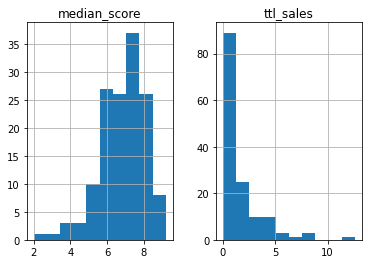

In [127]:
median_PS4_user.hist()
plt.show()

In [128]:
print(game_data.corr())

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.093509  0.003364 -0.168291     0.037172   
na_sales               -0.093509  1.000000  0.765318  0.449790     0.638680   
eu_sales                0.003364  0.765318  1.000000  0.435182     0.722778   
jp_sales               -0.168291  0.449790  0.435182  1.000000     0.291163   
other_sales             0.037172  0.638680  0.722778  0.291163     1.000000   
critic_score            0.011368  0.240755  0.220752  0.152593     0.198554   
user_score             -0.266035  0.086200  0.055337  0.125598     0.057119   
ttl_sales              -0.077113  0.941021  0.901234  0.612426     0.749272   

                 critic_score  user_score  ttl_sales  
year_of_release      0.011368   -0.266035  -0.077113  
na_sales             0.240755    0.086200   0.941021  
eu_sales             0.220752    0.055337   0.901234  
jp_sales             0.152593    0.125598   0.612426  
other_sales  

(0.0, 350.0)

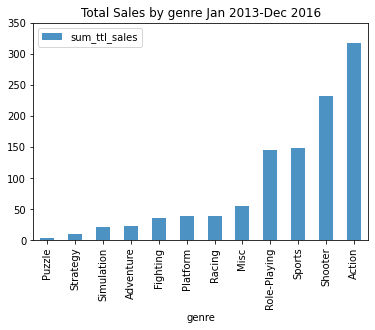

In [129]:
#Checking total sales by genre.

genre_stat_sales = top_games.pivot_table(
    index='genre', values='ttl_sales', aggfunc='sum'
)

genre_stat_sales.columns = ['sum_ttl_sales']

genre_stat_sales['genre']= genre_stat_sales.index
genre_stat_sales.sort_values('sum_ttl_sales').plot(x='genre', y = 'sum_ttl_sales', kind='bar',alpha = .8)
plt.title('Total Sales by genre Jan 2013-Dec 2016')
plt.ylim(0,350)

We can clearly see that the "Action" genre had the highest sales in this time frame across all platforms, followed by "Shooter" and then "Sports" and "Role Playing". 

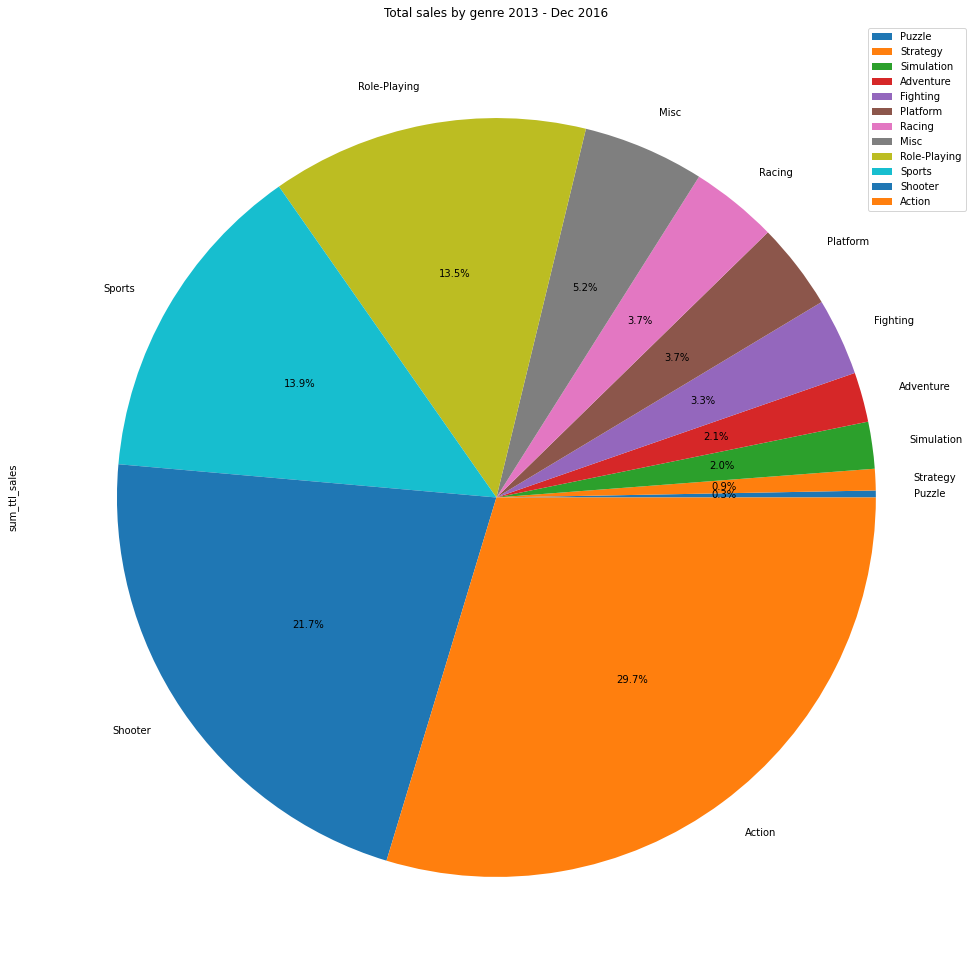

In [130]:
genre_stat_sales.sort_values('sum_ttl_sales').plot(autopct='%1.1f%%', x='genre', y = 'sum_ttl_sales', kind='pie', figsize=(17,24))
plt.title('Total sales by genre 2013 - Dec 2016')
plt.show() #Another way of visualizing the same sales data from bar chart to pie chart by genre

In [131]:
genre_stat_sales

,sum_ttl_sales,genre
genre,,
Action,318.32,Action
Adventure,22.72,Adventure
Fighting,35.29,Fighting
Misc,55.51,Misc
Platform,39.69,Platform
Puzzle,3.17,Puzzle
Racing,39.89,Racing
Role-Playing,144.86,Role-Playing
Shooter,232.98,Shooter


In [132]:
top_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


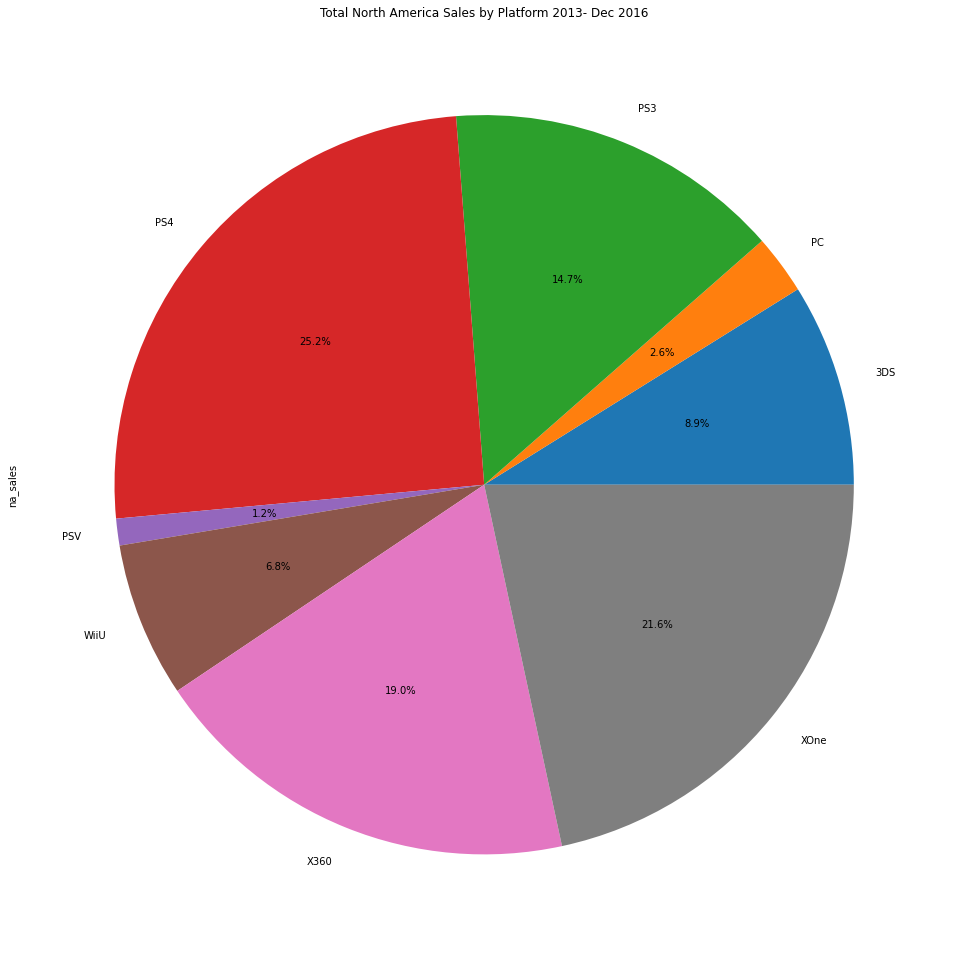

In [133]:
top_games.groupby('platform')['na_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(17,17))
plt.title('Total North America Sales by Platform 2013- Dec 2016')
plt.show()

In [134]:
print('For North America % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False))/top_games['na_sales'].sum());



For North America % sales by platform from 2013-Dec 2016:
platform
PS4     0.252496
XOne    0.216226
X360    0.189616
PS3     0.147448
3DS     0.088701
WiiU    0.067826
PC      0.025983
PSV     0.011703
Name: na_sales, dtype: float64


For the North American market the sales of Sony Play Station vs Microsoft XBox are almost the same so the best type of advertisement would be top games like FIFA 17 and then state they are available for both XOne and PS4.

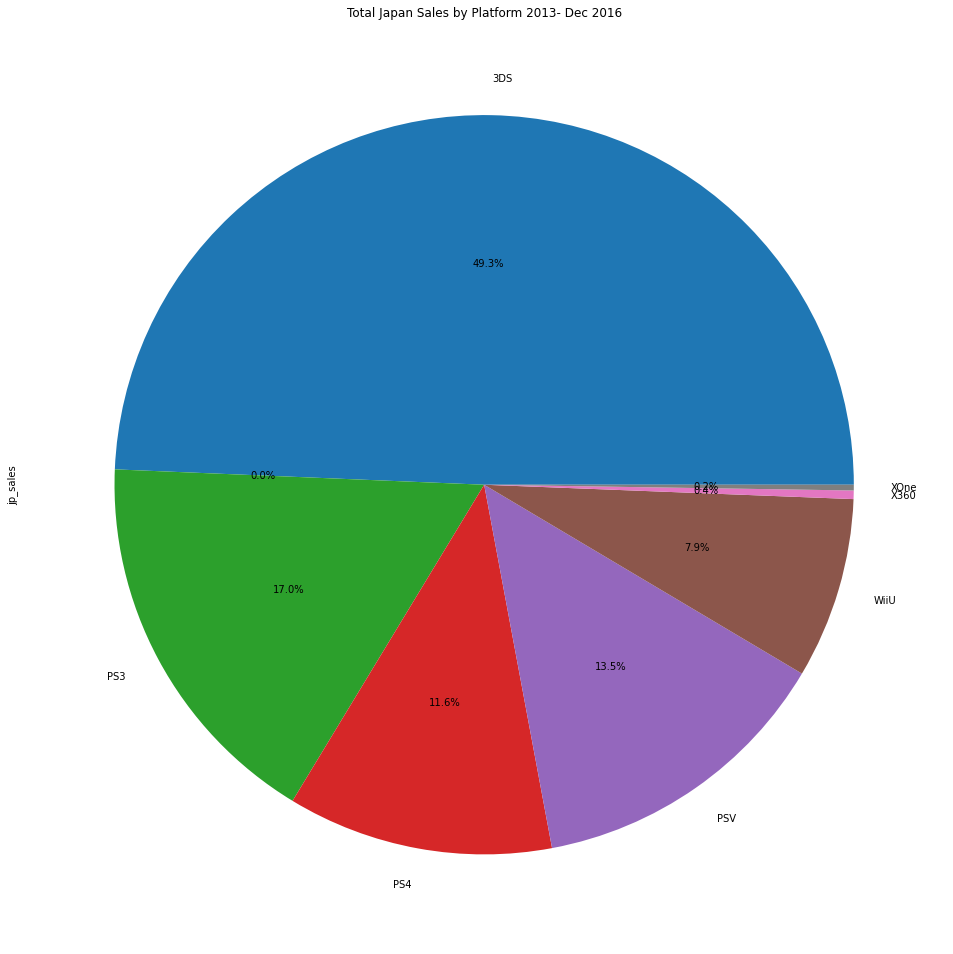

In [135]:
top_games.groupby('platform')['jp_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(17,17))
plt.title('Total Japan Sales by Platform 2013- Dec 2016')
plt.show()

In [136]:
print('For Japan % sales by platform from 2013-Dec 2016:') #Printing top platforms by percentage of sales. 
print((top_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False))/top_games['jp_sales'].sum());

For Japan % sales by platform from 2013-Dec 2016:
platform
3DS     0.493379
PS3     0.169892
PSV     0.135259
PS4     0.116123
WiiU    0.079162
X360    0.003711
XOne    0.002474
PC      0.000000
Name: jp_sales, dtype: float64


One thing that is very apparent in the Japanese market is that they are very loyal to platforms made in Japan. For example the 3DS is manufactured by Nintendo which is a Japanese company. PS3, PSV and PS4 are manufactured by Sony which is also a Japanese company. The market penetration of XBox (Microsoft) is tiny to nill compared to EU and North America. It is also clear that Japanese customers enjoy hand-held portable consoles like the PSV and the 3DS so it important to keep all this in mind when marketing products to the Japanese market. ICE should not waste any money advertising for example a game if it is only going to be available for XOne in 2017. 3DS accounted for almost 50% of sales in the last couple of years so this is the platform to firstly advertise for in Japan. Japan also had no PC sales so that is also something unique about the Japanese market that is quite different than other markets. 

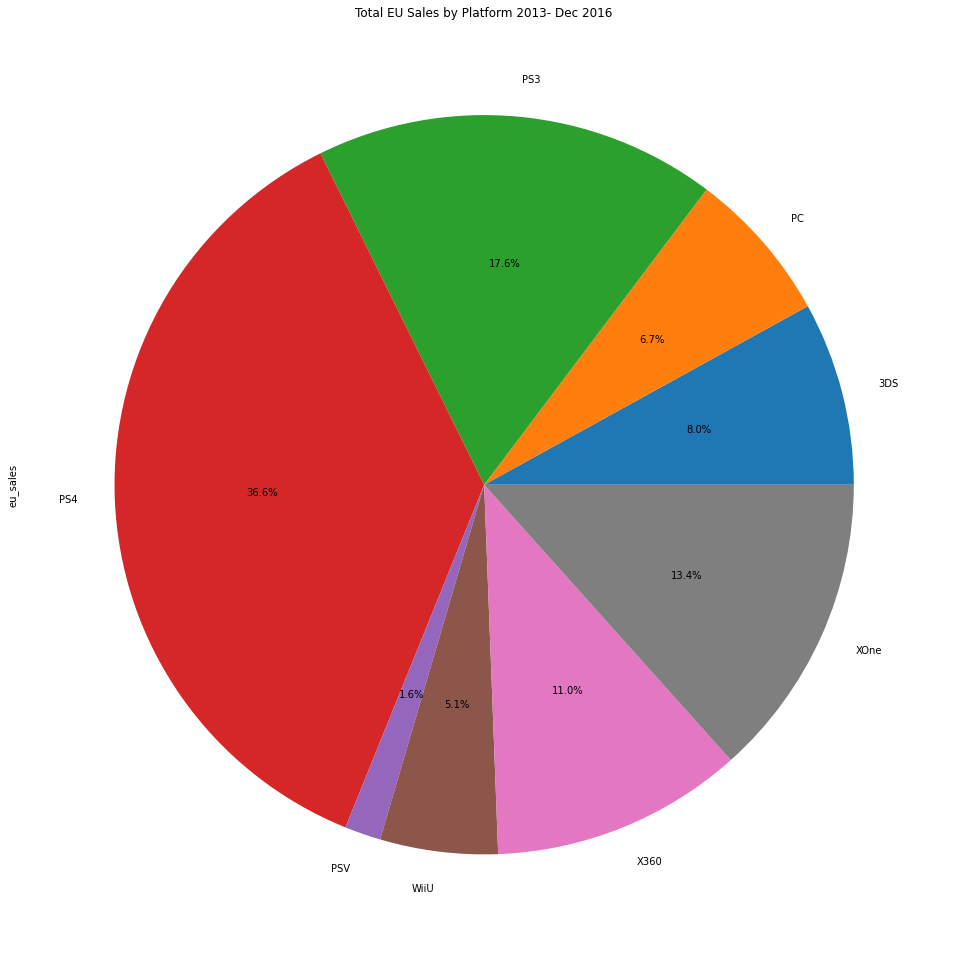

In [137]:
top_games.groupby('platform')['eu_sales'].sum().plot(autopct='%1.1f%%',kind='pie',figsize=(17,17))
plt.title('Total EU Sales by Platform 2013- Dec 2016')
plt.show()

In [138]:
print('For EU % sales by platform 2013-Dec 2016:') #Printing top platforms by percentage of sales. 
print((top_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False))/top_games['eu_sales'].sum());

For EU % sales by platform 2013-Dec 2016:
platform
PS4     0.365746
PS3     0.175783
XOne    0.133736
X360    0.110224
3DS     0.080257
PC      0.066985
WiiU    0.051457
PSV     0.015813
Name: eu_sales, dtype: float64


In the European Market the Sony Play Stations PS3 and PS4 have a significant bigger share of the market compared to Microsoft XOne and X360. Microsoft Play station has about 24% and Sony Play Station has about 56% (including PSV) so advertising should be focused more on the Play Station platform rather than the XBox platform. 

Now we will look at percentage of sales by genre for EU, North America and Japan markets.

In [139]:
print('For North America % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False))/top_games['na_sales'].sum());

For North America % sales by platform from 2013-Dec 2016:
genre
Action          0.288929
Shooter         0.254818
Sports          0.151210
Role-Playing    0.107742
Misc            0.055728
Platform        0.038824
Fighting        0.036107
Racing          0.030093
Adventure       0.016486
Simulation      0.010867
Strategy        0.007268
Puzzle          0.001927
Name: na_sales, dtype: float64


In [140]:
print('For EU % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))/top_games['eu_sales'].sum());

For EU % sales by platform from 2013-Dec 2016:
genre
Action          0.303920
Shooter         0.227758
Sports          0.154500
Role-Playing    0.095837
Racing          0.052338
Misc            0.044173
Platform        0.037096
Simulation      0.027945
Fighting        0.022164
Adventure       0.020972
Strategy        0.010706
Puzzle          0.002592
Name: eu_sales, dtype: float64


In [141]:
print('For JP % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False))/top_games['jp_sales'].sum());

For JP % sales by platform from 2013-Dec 2016:
genre
Role-Playing    0.363868
Action          0.288490
Misc            0.065338
Fighting        0.055515
Shooter         0.048094
Adventure       0.037180
Sports          0.035725
Platform        0.034852
Simulation      0.032887
Racing          0.016735
Strategy        0.012733
Puzzle          0.008586
Name: jp_sales, dtype: float64


The top 5 categories by genre are quite similar in North America and Europe with the top 4 being identical in the same order. First Action then Shooter, Sports then Role-Playing. Japan again is a very different mix with Role-Playing in first place with almost 12% of sales where in NA and EU this genre comes in 4th place. 

Now we will look at the ESRB rating and percentage of sales by region.

In [142]:
print('For NA % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False))/top_games['na_sales'].sum());

For NA % sales by platform from 2013-Dec 2016:
rating
M       0.383806
E       0.182185
T       0.115613
E10+    0.111387
Name: na_sales, dtype: float64


In [143]:
print('For EU % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))/top_games['eu_sales'].sum());

For EU % sales by platform from 2013-Dec 2016:
rating
M       0.377955
E       0.211712
T       0.108669
E10+    0.098429
Name: eu_sales, dtype: float64


In [144]:
print('For JP % sales by platform from 2013-Dec 2016:')
print((top_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))/top_games['jp_sales'].sum());

For JP % sales by platform from 2013-Dec 2016:
rating
T       0.148719
E       0.109139
M       0.102663
E10+    0.042855
Name: jp_sales, dtype: float64


Once again we see the EU and the NA markets behaving the same way with the exact order of percentage of sales first M then E, T and E10+ at the bottom. The first 3 categories are reversed for Japan with T (Teen) at the top, then E (Everyone) then Mature in 3rd place. The only thing that is common to all markets is that the E10+ category was at the bottom for all 3 major markets. This is quite shocking since Japan doesn't have a large demographic of teenagers and children under 15 years of age (only about 12% of total population). This means adults over 18 like T and E rated games more than M rated games. This makes sense because the genre that is most sold in Japan is Role-Playing and this genre is mostly rated T. In NA and EU the Shooter genre is in first place and this genre is mostly rated M by ESRB. See below table for count of games by genre and ESRB rating. 

In [145]:
top_games.pivot_table(index='rating',columns = 'genre', values = 'name', aggfunc = 'count')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
rating,,,,,,,,,,,,
E,46.0,2.0,NaN,13.0,23.0,5.0,50.0,2.0,NaN,14.0,124.0,7.0
E10+,98.0,17.0,3.0,25.0,34.0,5.0,11.0,10.0,16.0,4.0,15.0,4.0
M,163.0,26.0,4.0,4.0,NaN,NaN,2.0,53.0,119.0,NaN,NaN,1.0
T,106.0,13.0,41.0,17.0,5.0,NaN,4.0,72.0,26.0,11.0,24.0,12.0


In [146]:
top_games.query('jp_sales>1 & year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN,1.33


For the Japanese market Pokemon Sun/Moon is in the Role-Playing genre and is the number one game on 3DS as far as sales in Japan go. It had no sales in 2015 so it must have launched in 2016 and it should continue to sell well into 2017 in the Japanese market as well as NA and EU markets. 

## 1. Hypothesis     <a id='Hypothesis_1'></a>
### Average user ratings of the Xbox One and PC platforms are the same.

[Back to Contents](#back)

The above statement is the H0 or Null Hypothesis and we will test it with the p_value from ttest and an alpha of .05.

In [147]:
top_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2138 non-null   object 
 1   platform         2138 non-null   object 
 2   year_of_release  2138 non-null   int64  
 3   genre            2138 non-null   object 
 4   na_sales         2138 non-null   float64
 5   eu_sales         2138 non-null   float64
 6   jp_sales         2138 non-null   float64
 7   other_sales      2138 non-null   float64
 8   critic_score     993 non-null    float64
 9   user_score       1185 non-null   float64
 10  rating           1231 non-null   object 
 11  ttl_sales        2138 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 217.1+ KB


In [148]:
sample_1 = top_games.query('platform == "XOne" ').user_score

In [149]:
sample_2 =  top_games.query('platform == "PC" ').user_score

In [150]:
p_value= st.ttest_ind(sample_1, sample_2,nan_policy='omit').pvalue

In [151]:
print(p_value)

0.15503167687396294


In [152]:

alpha=0.05 # use an alpha of .05 since it is the most commonly used in statistics
if p_value<alpha:
    print('Reject Null Hypothesis: the average of sample_1 is not equal to average of sample_2')
else:
    print( "Fail to Reject Null Hypothesis: We don't have enough evidence to say that averages of sample_1 \
    and sample 2 are not the same")

Fail to Reject Null Hypothesis: We don't have enough evidence to say that averages of sample_1     and sample 2 are not the same


We cannot say with confidence that user ratings for the XOne are different than rating for PC games. 

In [153]:
sample_1.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [154]:
sample_2.describe()

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

We see that the mean and median user ratings for both PC and Xbox are almost identical so we can't reject H0. 

# 2. Hypothesis <a id='Hypothesis_2'></a>

[Back to Contents](#back)

### Average user ratings for the Action and Sports genres are different.

The null or H0 hypothesis would still state. Average user rating for Action and Sports genres is the same. Lets test it by the same method below.

In [155]:
sample1 = top_games.query('genre == "Action" ').user_score

In [156]:
sample2 = top_games.query('genre == "Sports" ').user_score

In [157]:
p_value= st.ttest_ind(sample1, sample2,nan_policy='omit').pvalue

In [158]:
alpha=0.05 # use an alpha of .05 since it is the most commonly used in statistics
if p_value<alpha:
    print('Reject Null Hypothesis: the average of sample1 is not equal to average of sample2')
else:
    print( "Fail to Reject Null Hypothesis: We don't have enough evidence to say that averages of sample_1 \
    and sample 2 are not the same")

Reject Null Hypothesis: the average of sample1 is not equal to average of sample2


In [159]:
sample1.describe()

count    390.000000
mean       6.849487
std        1.321675
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [160]:
sample2.describe()

count    157.000000
mean       5.261783
std        1.791165
min        0.200000
25%        4.100000
50%        5.600000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

We can see above that both the means and the medians for both Action and Sports genre tend to be different with ratings for Action games tending to have a higher user rating than Sports games. 

## General Conclusions:  <a id='end'></a>

[Back to Contents](#back)



Intro: As we exit the year 2016 and enter 2017 we see that ICE has seen 3 years of total sales dropping on a year-over-year basis. Although we still have the very important month of December to account for with Holiday sales accounting for a high volume of sales, it appears that 2016 will be lower in total sales compared to 2015 continuing the downward trend. To reverse this trend marketing campaigns must be targeted by region to make the most out of marketing dollars and effectively increase sales. Below are some major themes and patterns observed from studying game data and sales from 2013 to present day X December, 2016. 

1. We foundd that the top 3 platforms by sales are PS4, XOne and 3DSare in this order. Together they constitute over 85% of sales in 2016. Following the 80/20 rule we know that we should put the majority of resources into these platforms if we want to increase sales which I would argue is the number one determining factor for success of a game or platform from ICE's perspective. Below I will show how we can target sales for these platforms and games more specifically by market. Out of the top three PS4 has 54% of sales in 2016 follow by XOne with less than half at 20% then 3DS with 12%. PS4 sales are larger than all other top 5 platforms put together.  PS4 can also be marketed across all markets since all markets have a significant amount of sales for this platform. 

2. Because PS4 platform is so dominant I would recommend not to market XOne games that will only be released on XOne unless they have very high sales in that specific market or region. However, some games on PS4 that never launch on XOne are fine to advertise on even if they never launch on XOne due to the huge volume of sales. One clear example is "Uncharted 4: A Thief's End" which only launched on PS4 but has such high sales in EU and NA that can be marketed by itself. 

3. Out of these 3 top platforms 3DS has been around since 2010 but PS4 and XOne launched in 2013 so they should have a longer life-cycle ahead of them. 3DS showed weakness in sales actually shrinking from 2013 through 2015 and then picking up a bit in 2016 (as a percentage of total sales across all markets). So out of these 3 I would focus mostly on PS4 and XOne since they are currently growing their market share rapidly and have more years of success ahead of them compared to 3DS before it is phased out and a new Nintendo hand-held platform is launched. The typical life-cycle of a platform we found was about 8 years so 3DS is going into the last stretch of it's life-cycle. 3DS still represent over 40% of sales in Japan so for this market it is still probably quite profitable to promote 3DS games. Marketing for 3DS should be done to a lesser degree in other markets other than blockbuster games like Pokemon Sun/Moon which did great not only in Japan but in NA and EU markets as well in 2016.



4. For the North American and European market I recommend advertising heavily for "Call of Duty: Infinite Warfare" since it is on both PS4 and XOne and these platforms account for majority of sales in 2016. It is also helpful that this game together with other games like "Battlefield 1" have great sales in both these regions and since you can just add a statement that the game is available on both Xone and PS4 it gives best "bang for your buck" as opposed to some games that only launch on one platform. Shooter games are the number 1 ranked genre in both EU and North America so these campaigns could be the same or similar for both markets reducing the amount spent instead of tailoring marketing to each specific region. 

5. FIFA 16 is the number one game by sales but it is mostly sold in Europe. ICE should plan to market FIFA heavily in the EU market into 2017 and what is left of 2016 since this game is a cash cow. Any sequels of the games mentioned should have a healthy allocation of marketing spend since previous sequels  of these games  have brought in a lot of sales for previous years as well as 2016. 

3. The Japanese market is quite different than the US and European market so marketing campaigns should always be tailored to this particular market. The first thing to notice is that Microsoft Xbox - XOne or X360 should not be cautiously marketed in Japan since they seem to be very loyal to Japanese made platforms like Nintendo's 3DS and Sony's PS4 and PS3. I believe that marketing money would be best spent focusing on the platforms that are Japanese made and especially on the hand-held 3DS platform and specifically the Pokemon Sun/Moon game which is bringing is the highest sales for the Japanese market. 

6. Critic scores seem to be moderately correlated to total sales whereas user scores don't seem to impact sales or influence sales much since their correlation is very weak. It seems it is a case where critics are professionals and they are a lot more accurate at determining what games will be successful and this of course has an impact on sales. 

7. Some games with very high sales like Grand Theft Auto V need to be closely monitored in case a sequel is launched in 2017. There didn't seem to be a new sequel in 2 years and typically GTA launches a sequel every 2 years. If they were to launch a new GTA in 2017 this should be a heavily marketed game. (Pretending I don't know that GTA V was the last lauch I beleive for Plastation and Xbox.

8. We can see that 2008 was the year that ICE had the highest sales and it is also the same year that it had the most individual games launched and listed on it's website for sale. It might be worthwhile to see if ICE can list more games even if they are not the big blockbuster games but this might help with the downtrend that ICE has seen in sales since 2008 until today.